# Read data and split to train and test set

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

data = pd.read_csv("data/processed_nist_data.csv", header=None).as_matrix()
X, y = data[:, 1:], data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

/home/shivam/prenv/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# K-Means clustering with raw images

In [4]:
predictor= KMeans(n_clusters=10, n_init=100, n_jobs=8)
predictor.fit(X_train, y_train)
y_predicted = predictor.predict(X_test)
print "Prediction accuracy of K-Means: {}%".format(accuracy_score(y_test, y_predicted)*100)

Prediction accuracy of K-Means: 3.65%


# K-Means clustering with PCA transform

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
predictor = KMeans(n_clusters=10, n_init=1000, n_jobs=8)
predictor.fit(pca.fit_transform(X_train), y_train)

x_test_pca = pca.transform(X_test)
y_predicted = predictor.predict(x_test_pca)

print "Prediction accuracy of K-Means with PCA: {}%".format(accuracy_score(y_test, y_predicted)*100)

Prediction accuracy of K-Means with PCA: 8.45%


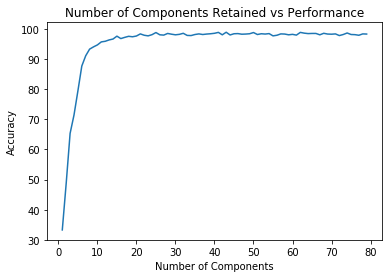

{1: 33.300000000000004,
 2: 48.75,
 3: 65.299999999999997,
 4: 71.399999999999991,
 5: 79.400000000000006,
 6: 87.649999999999991,
 7: 91.049999999999997,
 8: 93.25,
 9: 94.0,
 10: 94.650000000000006,
 11: 95.650000000000006,
 12: 95.850000000000009,
 13: 96.299999999999997,
 14: 96.599999999999994,
 15: 97.549999999999997,
 16: 96.75,
 17: 97.150000000000006,
 18: 97.5,
 19: 97.350000000000009,
 20: 97.599999999999994,
 21: 98.299999999999997,
 22: 97.850000000000009,
 23: 97.650000000000006,
 24: 98.049999999999997,
 25: 98.75,
 26: 98.0,
 27: 97.899999999999991,
 28: 98.450000000000003,
 29: 98.200000000000003,
 30: 98.0,
 31: 98.150000000000006,
 32: 98.5,
 33: 97.799999999999997,
 34: 97.75,
 35: 98.099999999999994,
 36: 98.299999999999997,
 37: 98.099999999999994,
 38: 98.25,
 39: 98.350000000000009,
 40: 98.5,
 41: 98.799999999999997,
 42: 98.0,
 43: 98.850000000000009,
 44: 97.950000000000003,
 45: 98.350000000000009,
 46: 98.400000000000006,
 47: 98.200000000000003,
 48: 98.25

In [3]:
import pr_utils as pu
from sklearn.svm import SVC

predictor = SVC()
pu.experimentPCA_fulldata(predictor, data, "testing-SVM", show_results=True)